In [ ]:
pip install -qU langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET
from langchain_community.document_loaders import DataFrameLoader
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

In [ ]:
boston_data = pd.read_csv('boston.csv')

boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
pip install -qU unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 7.8 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders.csv_loader import UnstructuredCSVLoader

loader = UnstructuredCSVLoader(file_path = '/content/boston.csv', mode = 'elements')

docs = loader.load()

print(len(docs))
print(docs[0].metadata['text_as_html'][:1000])

1
<table><tr><td>CRIM</td><td>ZN</td><td>INDUS</td><td>CHAS</td><td>NOX</td><td>RM</td><td>AGE</td><td>DIS</td><td>RAD</td><td>TAX</td><td>PTRATIO</td><td>B</td><td>LSTAT</td><td>MEDV</td></tr><tr><td>0.00632</td><td>18.0</td><td>2.31</td><td>0.0</td><td>0.538</td><td>6.575</td><td>65.2</td><td>4.09</td><td>1.0</td><td>296.0</td><td>15.3</td><td>396.9</td><td>4.98</td><td>24.0</td></tr><tr><td>0.02731</td><td>0.0</td><td>7.07</td><td>0.0</td><td>0.469</td><td>6.421</td><td>78.9</td><td>4.9671</td><td>2.0</td><td>242.0</td><td>17.8</td><td>396.9</td><td>9.14</td><td>21.6</td></tr><tr><td>0.02729</td><td>0.0</td><td>7.07</td><td>0.0</td><td>0.469</td><td>7.185</td><td>61.1</td><td>4.9671</td><td>2.0</td><td>242.0</td><td>17.8</td><td>392.83</td><td>4.03</td><td>34.7</td></tr><tr><td>0.03237</td><td>0.0</td><td>2.18</td><td>0.0</td><td>0.458</td><td>6.998</td><td>45.8</td><td>6.0622</td><td>3.0</td><td>222.0</td><td>18.7</td><td>394.63</td><td>2.94</td><td>33.4</td></tr><tr><td>0.06905</t

In [ ]:
# 상위 10개 문서 추출
top_10_docs = docs[:10]

# XML 루트 생성
root = ET.Element('Root')

# 상위 10개 데이터를 XML로 변환
for doc in top_10_docs:
    row_elem = ET.SubElement(root, 'Row')
    # 메타데이터에서 텍스트 데이터 추출
    text_as_html = doc.metadata.get('text_as_html', '')
    # XML 요소로 텍스트 데이터를 추가
    text_elem = ET.SubElement(row_elem, 'Text')
    text_elem.text = text_as_html

# XML 데이터를 문자열로 변환
xml_data = ET.tostring(root, encoding='utf-8').decode('utf-8')

# XML 출력
print(xml_data)

# XML 파일로 저장 (옵션)
with open('output.xml', 'w', encoding='utf-8') as f:
    f.write(xml_data)

<Root><Row><Text>&lt;table&gt;&lt;tr&gt;&lt;td&gt;CRIM&lt;/td&gt;&lt;td&gt;ZN&lt;/td&gt;&lt;td&gt;INDUS&lt;/td&gt;&lt;td&gt;CHAS&lt;/td&gt;&lt;td&gt;NOX&lt;/td&gt;&lt;td&gt;RM&lt;/td&gt;&lt;td&gt;AGE&lt;/td&gt;&lt;td&gt;DIS&lt;/td&gt;&lt;td&gt;RAD&lt;/td&gt;&lt;td&gt;TAX&lt;/td&gt;&lt;td&gt;PTRATIO&lt;/td&gt;&lt;td&gt;B&lt;/td&gt;&lt;td&gt;LSTAT&lt;/td&gt;&lt;td&gt;MEDV&lt;/td&gt;&lt;/tr&gt;&lt;tr&gt;&lt;td&gt;0.00632&lt;/td&gt;&lt;td&gt;18.0&lt;/td&gt;&lt;td&gt;2.31&lt;/td&gt;&lt;td&gt;0.0&lt;/td&gt;&lt;td&gt;0.538&lt;/td&gt;&lt;td&gt;6.575&lt;/td&gt;&lt;td&gt;65.2&lt;/td&gt;&lt;td&gt;4.09&lt;/td&gt;&lt;td&gt;1.0&lt;/td&gt;&lt;td&gt;296.0&lt;/td&gt;&lt;td&gt;15.3&lt;/td&gt;&lt;td&gt;396.9&lt;/td&gt;&lt;td&gt;4.98&lt;/td&gt;&lt;td&gt;24.0&lt;/td&gt;&lt;/tr&gt;&lt;tr&gt;&lt;td&gt;0.02731&lt;/td&gt;&lt;td&gt;0.0&lt;/td&gt;&lt;td&gt;7.07&lt;/td&gt;&lt;td&gt;0.0&lt;/td&gt;&lt;td&gt;0.469&lt;/td&gt;&lt;td&gt;6.421&lt;/td&gt;&lt;td&gt;78.9&lt;/td&gt;&lt;td&gt;4.9671&lt;/td&gt;&lt;td&gt;2.0&l

In [ ]:
!apt-get update -y
!apt-get install -y fonts-nanum

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Fetched 4,225 kB in 3s (1,488 kB/s)
Reading pack

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

상위 3가지 주택 가격에 영향을 주는 요소:
       Coefficient
LSTAT     3.611658
RM        3.145240
DIS       3.081908


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


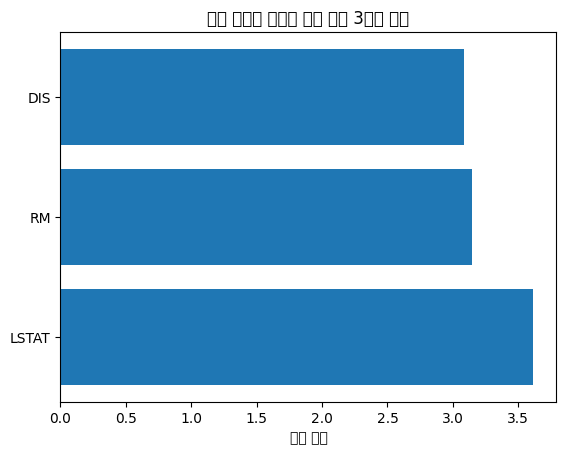

In [ ]:
# 종속 변수: 주택 가격 (대개 "MEDV" 컬럼으로 가정)
X = boston_data.drop(columns=['MEDV'])  # 주택 가격을 제외한 독립 변수들
y = boston_data['MEDV']  # 주택 가격 (MEDV)

rcParams['font.family'] = 'NanumGothic'

# 데이터 분할 (훈련 데이터 80%, 테스트 데이터 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 선형 회귀 모델 생성
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 회귀 계수 가져오기
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# 상위 3개 요소 추출
top_3_features = coefficients.abs().sort_values(by='Coefficient', ascending=False).head(3)

# 출력
print("상위 3가지 주택 가격에 영향을 주는 요소:")
print(top_3_features)

# 시각화 (선형 회귀 계수의 크기)
plt.barh(top_3_features.index, top_3_features['Coefficient'])
plt.xlabel('회귀 계수')
plt.title('주택 가격에 영향을 주는 상위 3가지 요소')
plt.show()